# Asymp app version of fig 3

Asymp

In [2]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [3]:
import pandas as pd

import seaborn as sns

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from plots2.fns import (
    get_corner_annotations,
    get_dose_colors
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import get_best_dose_for_cb
from poly2.config import get_asymptote_config
from poly2.simulator import SimulatorAsymptote
from poly2.consts import FUNG_DECAY_RATE, MUTATION_PROP, MUTATION_SCALE

Need to show why high mutation scale could incentivise lower dose

In [4]:
plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

In [10]:
pars = pd.DataFrame({
    'asymp_mu': 0.6,
    'asymp_b': 10,
    'curv': 10,
    'dec_rate': 1,
    'm_prop': 1,
    'm_scale': 10,
}, index=[0])

pars

,asymp_mu,asymp_b,curv,dec_rate,m_prop,m_scale
0,0.6,10,10,1,1,10


In [100]:
pars.iloc[0].to_dict()

{'asymp_mu': 0.6,
 'asymp_b': 10.0,
 'curv': 10.0,
 'dec_rate': 1.0,
 'm_prop': 1.0,
 'm_scale': 10.0}

In [11]:
from poly2.config import get_asymptote_config
from poly2.simulator import SimulatorAsymptote

In [12]:
cf = get_asymptote_config(n_years=35, n_k=300, verbose=False)

In [13]:
cf.k_mu = pars.asymp_mu.values[0]
cf.k_b = pars.asymp_b.values[0]
cf.curvature = pars.curv.values[0]
cf.decay_rate = FUNG_DECAY_RATE * pars.dec_rate.values[0]
cf.mutation_proportion = MUTATION_PROP * pars.m_prop.values[0]
cf.mutation_scale_fung = MUTATION_SCALE * pars.m_scale.values[0]

In [14]:
cf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
asymptote = None
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
curvature = 10
decay_rate = 0.009005
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
k_b = 10
k_mu = 0.6
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.198361584016981
n_k = 300
n_years = 35
sprays = None



In [15]:
%%time

datas = []

for dose in tqdm(np.linspace(0.1, 1, 2)):

    cf.doses = dose*np.ones(cf.n_years)

    data = SimulatorAsymptote(cf).run_model()
    
    datas.append(data)
    
# datas

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:29<00:00, 44.75s/it]

Wall time: 1min 29s


[{'fung_dists': array([[8.85913156e-32, 1.21246472e-05, 3.87129764e-05, ...,
          9.14516744e-01, 9.17608226e-01, 9.20422298e-01],
         [2.82200131e-27, 1.56792059e-07, 4.96939999e-07, ...,
          1.01742629e-02, 1.01638826e-02, 1.01503401e-02],
         [1.19842427e-24, 1.57865883e-07, 4.98826191e-07, ...,
          8.93978037e-03, 8.89172407e-03, 8.84116401e-03],
         ...,
         [1.68753900e-14, 1.26849360e-07, 1.96963538e-07, ...,
          1.85666261e-08, 1.85198805e-08, 1.84841822e-08],
         [3.33066907e-16, 1.25799139e-07, 1.94988458e-07, ...,
          1.82041980e-08, 1.81581905e-08, 1.81230610e-08],
         [0.00000000e+00, 1.18985972e-05, 1.82471924e-05, ...,
          9.35515673e-07, 9.32426031e-07, 9.30102620e-07]]),
  'fung_mean': array([0.6       , 0.5876816 , 0.57514689, 0.56242645, 0.54954373,
         0.53650649, 0.52329252, 0.50982625, 0.49594187, 0.48132575,
         0.4654356 , 0.44739779, 0.42591442, 0.39927047, 0.36562434,
         0.3237902

In [64]:
doses = [0.1, 1]

In [65]:
line_df = pd.concat([
    pd.DataFrame(dict(
        year = np.arange(1,36),
        yld = datas[ii]['yield_vec'],
        dose = doses[ii]
    ))
    for ii in range(2)
]
)

In [66]:
line_df

,year,yld,dose
0,1,9.626839,0.1
1,2,9.613378,0.1
2,3,9.599541,0.1
3,4,9.585349,0.1
4,5,9.570815,0.1
...,...,...,...
30,31,8.820850,1.0
31,32,8.820773,1.0
32,33,8.820703,1.0
33,34,8.820640,1.0


In [69]:
bd = get_best_dose_for_cb(line_df, 10.5, eps=0.2)

In [71]:
bd.describe()

,dose,year,yy
count,70.000000,70.000000,70.0
mean,0.408571,18.000000,10.5
std,0.430282,10.174421,0.0
min,0.100000,0.800000,10.5
25%,0.100000,9.350000,10.5
50%,0.100000,18.000000,10.5
75%,1.000000,26.650000,10.5
max,1.000000,35.200000,10.5


In [76]:
cols = get_dose_colors(5)[[1,4]]

TypeError: list indices must be integers or slices, not list

In [80]:
cols = get_dose_colors(5)

In [95]:
colrs = get_dose_colors(20)
colrs

[(0.993248, 0.906157, 0.143936),
 (0.866013, 0.889868, 0.095953),
 (0.730889, 0.871916, 0.156029),
 (0.585678, 0.846661, 0.249897),
 (0.458674, 0.816363, 0.329727),
 (0.335885, 0.777018, 0.402049),
 (0.239374, 0.735588, 0.455688),
 (0.162016, 0.687316, 0.499129),
 (0.12478, 0.640461, 0.527068),
 (0.121831, 0.589055, 0.545623),
 (0.136408, 0.541173, 0.554483),
 (0.15627, 0.489624, 0.557936),
 (0.175841, 0.44129, 0.557685),
 (0.19943, 0.387607, 0.554642),
 (0.223925, 0.334994, 0.548053),
 (0.250425, 0.27429, 0.533103),
 (0.270595, 0.214069, 0.507052),
 (0.28229, 0.145912, 0.46151),
 (0.280894, 0.078907, 0.402329),
 (0.267004, 0.004874, 0.329415)]

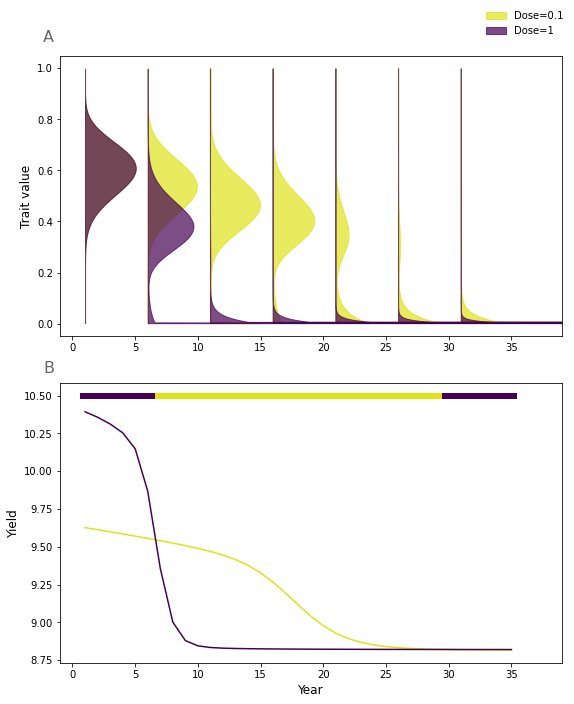

In [116]:
f, ax = plt.subplots(2, 1, figsize=(8,10))

colrs = get_dose_colors(20)
cols = [colrs[1], colrs[-1]]
# cols = get_dose_colors(2)

labels = ['Dose=0.1', 'Dose=1']

for ii in range(2):
    ax[1].plot(
        np.arange(1, 36),
        datas[ii]['yield_vec'],
        c=cols[ii],
    )
    
    ax[1].plot(
        bd.loc[lambda x: x.dose==doses[1-ii]].year,
        bd.loc[lambda x: x.dose==doses[1-ii]].yy,
        c=cols[1-ii],
        lw=6
    )
    
    for yy in range(0, 35, 5):

        if yy==0:
            label=labels[ii]
        else:
            label=None

        ax[0].fill_betweenx(
            datas[ii]['k_vec'],
            np.repeat(1+yy, 300),
            np.repeat(1+yy, 300) + 300*datas[ii]['fung_dists'][:, yy],
            color=cols[ii],
            alpha=0.7,
            label=label,
        )

ax[0].set_xlim([-1, 39])
ax[1].set_xlim([-1, 39])

ax[0].set_ylabel('Trait value')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Yield')

plt.tight_layout(rect=[0,0,1,0.92], h_pad=3)

f.legend(
    loc=1,
    bbox_to_anchor=(1,0.98),
    frameon=False
)

get_corner_annotations(1, 2, 0.075, 0.92, 0.1, 0.46, plt)

In [117]:
f.savefig('../figures/paper/app6_fig5.jpg', dpi=1200, bbox_inches="tight")